# Assignment3
# 2021021582 인공지능학과 양건준
## ※Input the path before running following code※

In [1]:
path=('./GMM-data.txt')

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tqdm import tqdm
from scipy.stats import multivariate_normal

#Define general functions
def load_data(path):
      df=pd.read_csv(path,sep=' ',header=None)
      df.columns=['x','y']
      return df


def Clusters(X,n_clusters):
        clusters=[]
        #Use the Kmeans as an initial value
        kmeans = KMeans(n_clusters).fit(X)
        mu_k = kmeans.cluster_centers_
    
        for i in range(n_clusters):
            clusters.append({
                'pi_k': 1.0 / n_clusters,
                'mu_k': mu_k[i],
                'cov_k': np.identity(X.shape[1], dtype=np.float64)
            })
            
        return clusters

def plot(X,  probs):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    label=[]
    for i in probs:
        label.append((np.argmax(i)))
    plt.scatter(data=X,x='x', y='y', c=label, s=40, cmap='viridis', zorder=2)


    


In [3]:
class GMM:
    def __init__(self,X,clusters,n_clusters,epoch) :
        self.clusters=clusters
        self.X=X
        self.n_clusters=n_clusters
        self.epoch=epoch
        
    def Expectation(X, clusters):
        sum = np.zeros((X.shape[0]), dtype=np.float64)

        for cluster in clusters:
            pi_k = cluster['pi_k']
            mu_k = cluster['mu_k']
            cov_k = cluster['cov_k']
            
            responsibility = pi_k * multivariate_normal.pdf(X, mu_k, cov_k)
            for i in range(X.shape[0]):
                sum[i] += responsibility[i]
            
            cluster['responsibility'] = responsibility
            cluster['sum'] = sum
            
        for cluster in clusters:
            cluster['responsibility'] /= cluster['sum']

    def Maximization(X, clusters):
    
        N = float(X.shape[0])
  
        for cluster in clusters:
            responsibility = cluster['responsibility']
            cov_k = np.zeros((X.shape[1], X.shape[1]))
            
            N_k = np.sum(responsibility, axis=0)
            
            pi_k = N_k / N
            
            responsibility=np.array(responsibility).reshape(X.shape[0],1)
            mu_k = np.sum(responsibility * X, axis=0) / N_k
            
            for j in range(X.shape[0]):
                diff = (np.array(X.loc[j] - mu_k)).reshape(-1, 1)
                cov_k += responsibility[j] * np.dot(diff, diff.T)
                
            cov_k /= N_k
            
            cluster['pi_k'] = pi_k
            cluster['mu_k'] = mu_k
            cluster['cov_k'] = cov_k


    def train(self):
        n_clusters=self.n_clusters
        epoch=self.epoch
        clusters = self.clusters
        X=self.X
        probs = np.zeros((X.shape[0], n_clusters))
        
        for i in tqdm(range(epoch)):
            GMM.Expectation(X, clusters)
            GMM.Maximization(X, clusters)
            
        for i, cluster in enumerate(clusters):
            probs[:, i] = np.log(cluster['responsibility']).reshape(-1)
            
        return probs

# Execution code
## To change the max number of clusters, change k (k>=2)
For example if k=3, there will be two plots showing the clusters when the number of clusters are 2 and 3
## To change the number of iteration, change epoch

100%|██████████| 10/10 [00:04<00:00,  2.47it/s]


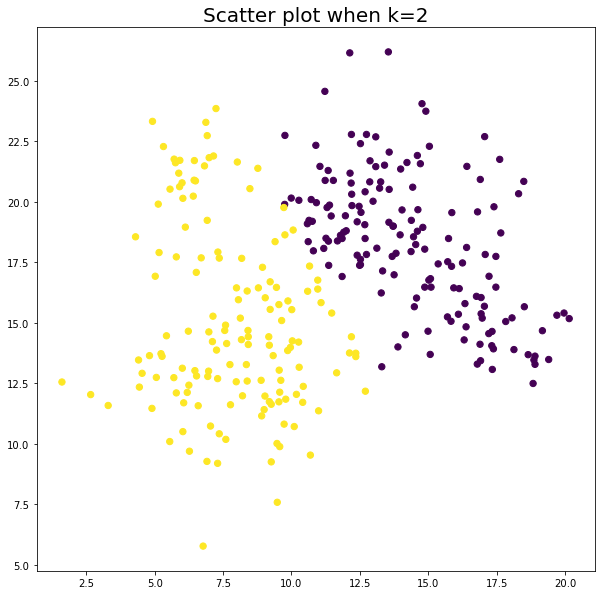

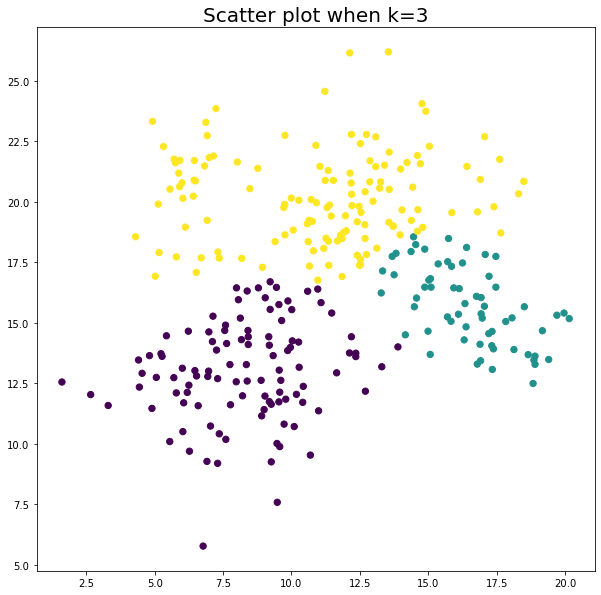

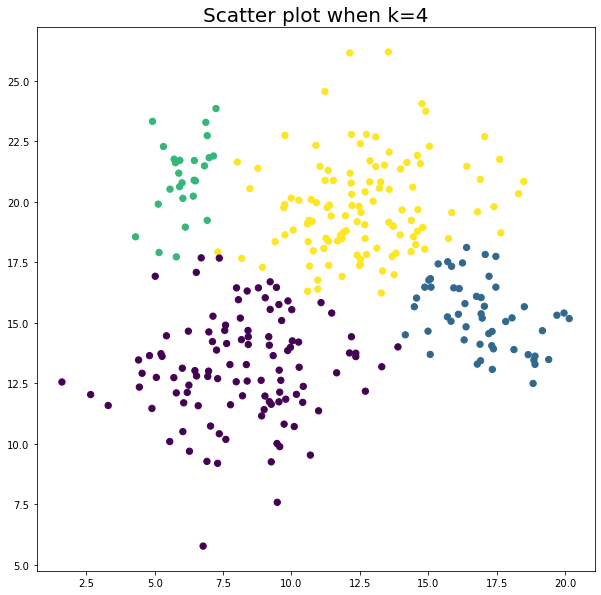

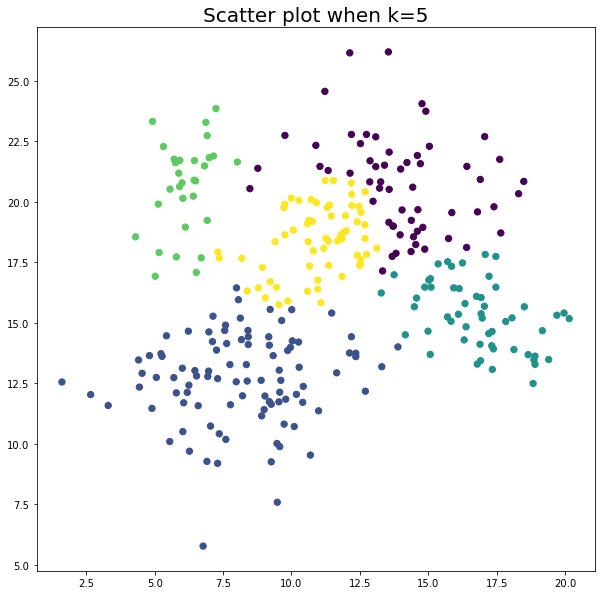

In [4]:
def main(path,k,epoch):
    X=load_data(path)
    for k in range(2,6):
        n_clusters = k
        epoch = epoch
        clusters=Clusters(X,n_clusters)
        gmm=GMM(X,clusters,n_clusters,epoch)
        probs=gmm.train()
        plot(X, probs)
        plt.title(f'Scatter plot when k={k}',fontsize=20)
        

        
main(path,k=4,epoch=10)